# __Importing the necessary libraries__

In [1]:
import xarray as xr 
import numpy as np
import pandas as pd 
import netCDF4
import matplotlib.pyplot as plt

# __Evaluating Variables__

In [3]:
netcdf_file = '../google_cloud_data.nc' 

xrds = xr.open_dataset(netcdf_file)
print(xrds.data_vars)   
df = xrds.to_dataframe()
orig = df.to_csv('../outputs/data.csv')

Data variables:
    sst      (time, zlev, lat, lon) float32 ...
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...


In [6]:
dataset = netCDF4.Dataset(netcdf_file, 'r')

# Get information about variables
variables = dataset.variables

# Print variable names
print("Variables:", list(variables.keys()))

Variables: ['time', 'lat', 'lon', 'sea_surface_temperature', 'fill_missing_qc']


# __Recognising lat and lon as columns instead of a multindex__

In [7]:

# df.dropna(subset=['air_temperature'], inplace=True)
df.to_csv('../outputs/sst_intermediate.csv')

# __Normalizing Longitude__

In [4]:
df = pd.read_csv('../outputs/data.csv')
df['lon'] = (df['lon'] + 180) % 360 - 180

# __Reconverting from csv to df__

In [5]:
df.drop(df.index[df['lat'] >35], inplace=True)
df.drop(df.index[df['lon'] < 60], inplace=True)

df.drop(df.index[df['lat'] <-11], inplace=True)
df.drop(df.index[df['lon'] > 115], inplace=True)
print(df.columns)
df.to_csv('../outputs/data_geo_scoped.csv')
print('Conversion completed. CSV file saved as smaller_humidity.csv')

Index(['time', 'zlev', 'lat', 'lon', 'sst', 'anom', 'err', 'ice'], dtype='object')
Conversion completed. CSV file saved as smaller_humidity.csv


In [6]:
print(df.isna().sum())

time        0
zlev        0
lat         0
lon         0
sst     16418
anom    16418
err     16418
ice     40480
dtype: int64


In [10]:
df.drop(df.index[df['time']!='2021-01-01 01:30:00'],inplace=True)
df.to_csv('../outputs/sst_remove_time.csv')

# __Visualize__

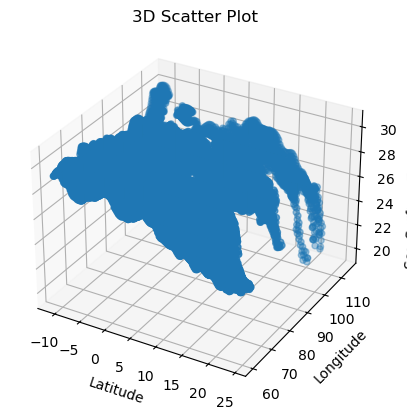

In [11]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(df['lat'], df['lon'], df['sea_surface_temperature'])

# Set labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Sea Surface Temperature')
ax.set_title('3D Scatter Plot')

plt.show()


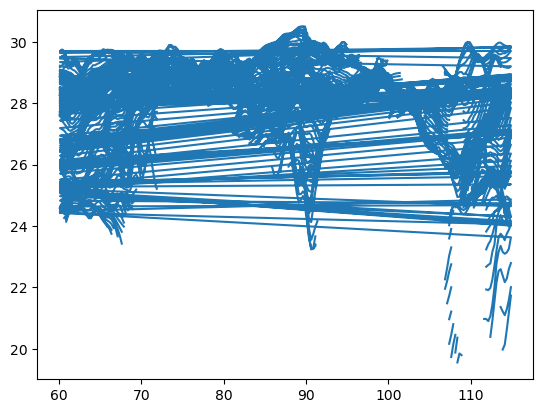

In [12]:
import matplotlib.pyplot as plt
plt.plot(df["lon"], df["sea_surface_temperature"])

#  __Recover all the missing values__

In [13]:
df['sea_surface_temperature']= df['sea_surface_temperature'].fillna(df['sea_surface_temperature'].rolling(11,min_periods=1).mean())
# df['air_temperature']= df['air_temperature'].fillna(pd.rolling_mean(df['air_temperature'], 6, min_periods=1))
# df['specific_humidity']= df['specific_humidity'].fillna(pd.rolling_mean(df['specific_humidity'], 6, min_periods=1))
# df['wind_speed'] = df['wind_speed'].fillna(pd.rolling_mean(df['wind_speed'], 6, min_periods=1))
df.to_csv('../outputs/sst_final.csv')
while df.isna().sum().sum()>0:
    df['sea_surface_temperature']= df['sea_surface_temperature'].fillna(df['sea_surface_temperature'].rolling(11,min_periods=1).mean())
df.isna().sum()
df.to_csv('../outputs/sst_final.csv')

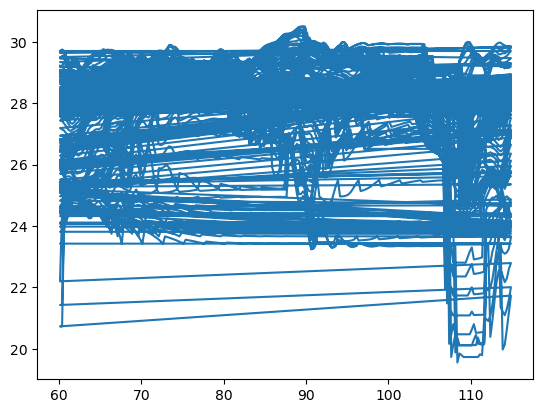

In [14]:
plt.plot(df["lon"], df["sea_surface_temperature"])


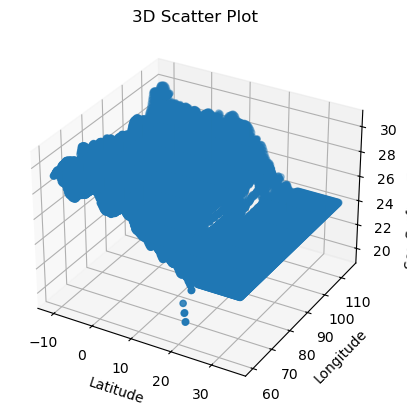

In [15]:

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

# Plot the data
ax2.scatter(df['lat'], df['lon'], df['sea_surface_temperature'])

# Set labels and title
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Longitude')
ax2.set_zlabel('Sea Surface Temperature')
ax2.set_title('3D Scatter Plot')

plt.show()

# __Merging the CSVs__

In [29]:
sst = pd.read_csv('outputs/sst_filtered.csv')
humdity = pd.read_csv('outputs/filtered_humidity.csv')

# Merge the two dataframes, using _ID column as key
df3 = pd.merge(sst, humdity, on = ['lat','lon'])
df3 = df3.drop('time_y', axis=1)
df3 = df3.drop('fill_missing_qc_x',axis=1)
df3 = df3.drop('fill_missing_qc_y',axis=1)
df3 = df3.drop('Unnamed: 0',axis=1)
df3.to_csv('outputs/merged.csv')

In [ ]:
plt.scatter(df3["sst"], df3["humidity"])

# __Clustering the data__

# __Visualizing the data to identify Outliers__

# __Normalizing the Dataset__

# __PyCaret Evaluation__

In [8]:
# from pycaret.datasets import get_data
# from pycaret.regression import *

# insuranceDataSet = get_data("insurance")
# s = setup(data = insuranceDataSet, target='charges', silent=True)
# cm = compare_models()